In [1]:
import scipy.stats
import os
import csv
from scipy.special import erf, erfinv
import numpy as np
import cPickle
%matplotlib nbagg
import matplotlib.pyplot as plt


In [2]:

fp = open('variability_data.pkl', 'r')
d = cPickle.load(fp)
fp.close()



<IPython.core.display.Javascript object>


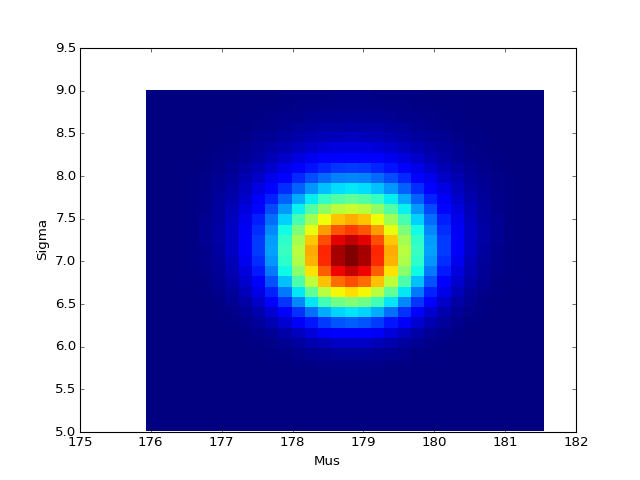

<IPython.core.display.Javascript object>


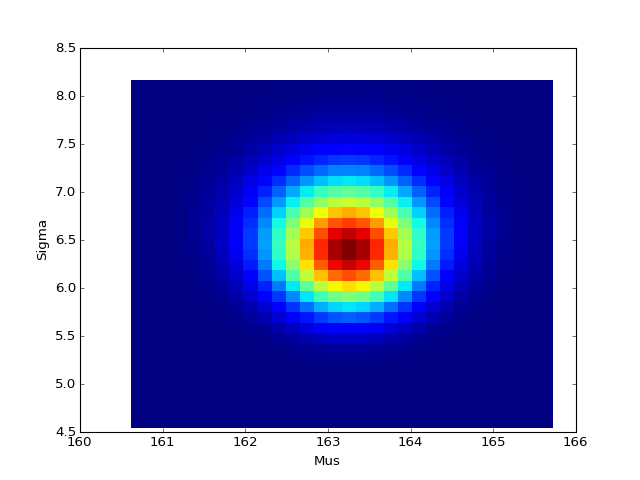

0.53103016900296063

In [3]:
d.keys()
labels = {1:'male', 2:'female'}

for i in [1,2]:
    N=100
    datause=np.array(d[i][:N])

    mean=datause.mean(dtype=np.float64)
    std=datause.std(dtype=np.float64)
    n=datause.shape[0]

    e_mean=std/np.sqrt(n)
    e_std=std/np.sqrt(2 * (n-1))

    spread=4.0
    num_points=31

    Mus=np.linspace(mean-spread*e_mean,mean+spread*e_mean,num_points)
    Sigmas=np.linspace(std-spread*e_std,std+spread*e_std,num_points+3)

    mus,sigmas=np.meshgrid(Mus,Sigmas)
    shape=mus.shape

    prior=mus*0+1.
    prior=prior/prior.sum()

    def prob(x,mus,sigmas):
        return scipy.stats.norm.pdf(x,mus,sigmas)

    posterior=prior.copy()
    for x in datause:
        posterior=posterior*prob(x,mus,sigmas)
    posterior=posterior/posterior.sum()

    plt.figure()
    plt.pcolormesh(Mus,Sigmas,posterior)
    plt.xlabel('Mus')
    plt.ylabel('Sigma')

    cvs=(sigmas/mus).flatten()
    inds=np.argsort(cvs)
    cvs=cvs[inds]
    cvspost=posterior.flatten()[inds]

    if i==1:
        cvsman=cvs.copy()
        cvspostman=cvspost.copy()
    if i==2:
        cvswoman=cvs.copy()
        cvspostwoman=cvspost.copy()
        
cvswomanA,cvsmanA=np.meshgrid(cvswoman,cvsman)
cvspostA=np.multiply.outer(cvspostwoman,cvspostman)


cvsdiff=cvsmanA-cvswomanA
cvspostA[cvsdiff>0].sum()

<IPython.core.display.Javascript object>


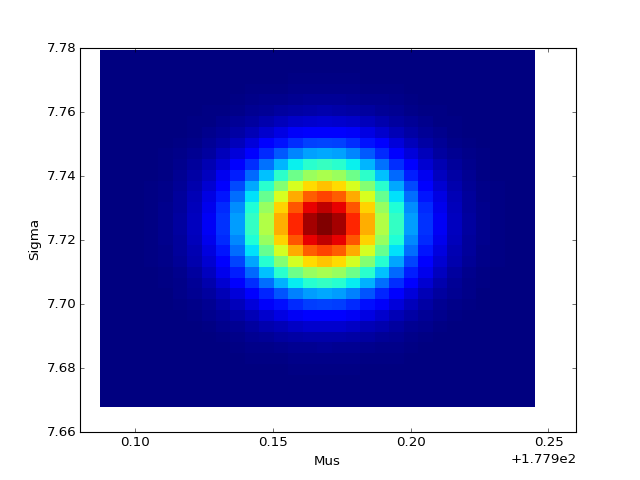

<IPython.core.display.Javascript object>


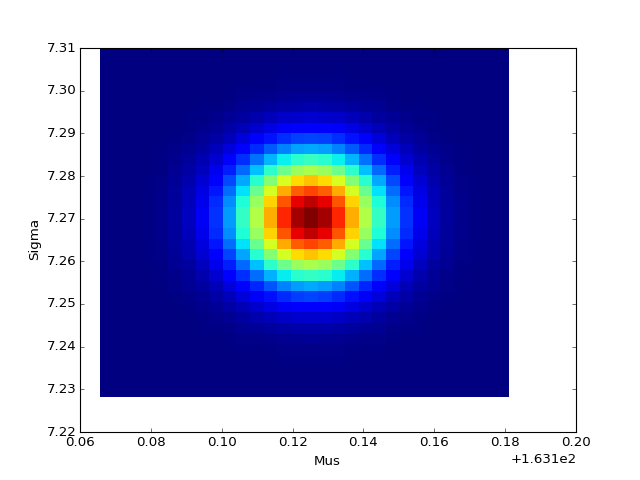

0.0445352106458 0.0433750192658 0.0


In [4]:
d.keys()
labels = {1:'male', 2:'female'}

for i in [1,2]:
    N=254722
    datause=np.array(d[i][:N])

    mean=datause.mean(dtype=np.float64)
    std=datause.std(dtype=np.float64)
    n=datause.shape[0]

    e_mean=std/np.sqrt(n)
    e_std=std/np.sqrt(2 * (n-1))

    spread=4.0
    num_points=31

    Mus=np.linspace(mean-spread*e_mean,mean+spread*e_mean,num_points)
    Sigmas=np.linspace(std-spread*e_std,std+spread*e_std,num_points+3)

    mus,sigmas=np.meshgrid(Mus,Sigmas)
    shape=mus.shape

    prior=mus*0+1.
    prior=prior/prior.sum()

    def prob(x,mus,sigmas):
        return scipy.stats.norm.logpdf(x,mus,sigmas)

    posterior=prior.copy()*0
    for x in datause:
        posterior=posterior+prob(x,mus,sigmas)
    
    posterior=posterior-posterior.max()
    posterior=np.exp(posterior)
    
    posterior=posterior/posterior.sum()

    plt.figure()
    plt.pcolormesh(Mus,Sigmas,posterior)
    plt.xlabel('Mus')
    plt.ylabel('Sigma')

    cvs=(sigmas/mus).flatten()
    inds=np.argsort(cvs)
    cvs=cvs[inds]
    cvspost=posterior.flatten()[inds]

    if i==1:
        cvsman=cvs.copy()
        cvspostman=cvspost.copy()
    if i==2:
        cvswoman=cvs.copy()
        cvspostwoman=cvspost.copy()

        
cvswomanA,cvsmanA=np.meshgrid(cvswoman,cvsman)
cvspostA=np.multiply.outer(cvspostwoman,cvspostman)


cvsdiff=cvsmanA-cvswomanA
print (cvswoman*cvspostwoman).sum(),(cvsman*cvspostman).sum(), cvspostA[cvsdiff>0].sum()


<IPython.core.display.Javascript object>


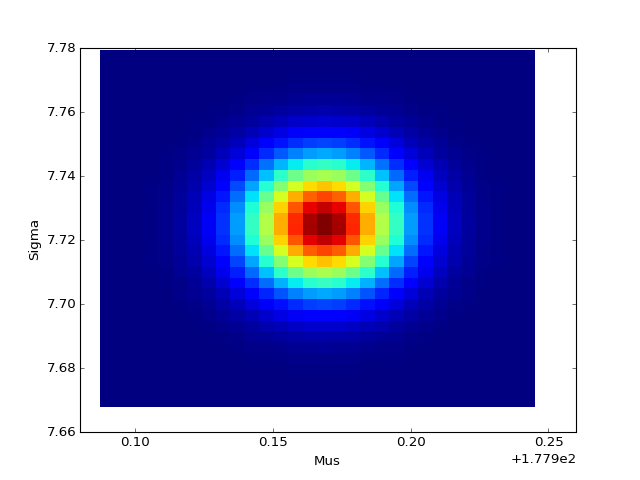

<IPython.core.display.Javascript object>


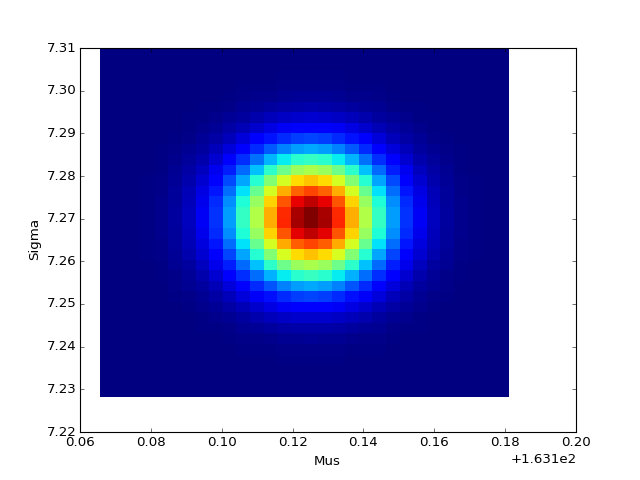

0.0445350794377 0.0433748084558 0.0


In [5]:
d.keys()
labels = {1:'male', 2:'female'}

for i in [1,2]:
    N=254722
    datause=np.array(d[i][:N])

    mean=datause.mean(dtype=np.float64)
    std=datause.std(dtype=np.float64)
    n=datause.shape[0]

    e_mean=std/np.sqrt(n)
    e_std=std/np.sqrt(2 * (n-1))

    spread=4.0
    num_points=31

    Mus=np.linspace(mean-spread*e_mean,mean+spread*e_mean,num_points)
    Sigmas=np.linspace(std-spread*e_std,std+spread*e_std,num_points+3)

    mus,sigmas=np.meshgrid(Mus,Sigmas)
    shape=mus.shape

    prior=mus*0+1.
    prior=prior/prior.sum()


    posterior=scipy.stats.norm.logpdf(mean,mus,sigmas/np.sqrt(n))
    posterior+=scipy.stats.norm.logpdf(std,sigmas,sigmas/np.sqrt(2*(n-1)))
    
    posterior=posterior-posterior.max()
    posterior=np.exp(posterior)
    
    posterior=posterior/posterior.sum()

    plt.figure()
    plt.pcolormesh(Mus,Sigmas,posterior)
    plt.xlabel('Mus')
    plt.ylabel('Sigma')

    cvs=(sigmas/mus).flatten()
    inds=np.argsort(cvs)
    cvs=cvs[inds]
    cvspost=posterior.flatten()[inds]

    if i==1:
        cvsman=cvs.copy()
        cvspostman=cvspost.copy()
    if i==2:
        cvswoman=cvs.copy()
        cvspostwoman=cvspost.copy()

        
cvswomanA,cvsmanA=np.meshgrid(cvswoman,cvsman)
cvspostA=np.multiply.outer(cvspostwoman,cvspostman)


cvsdiff=cvsmanA-cvswomanA
print (cvswoman*cvspostwoman).sum(),(cvsman*cvspostman).sum(), cvspostA[cvsdiff>0].sum()

<IPython.core.display.Javascript object>


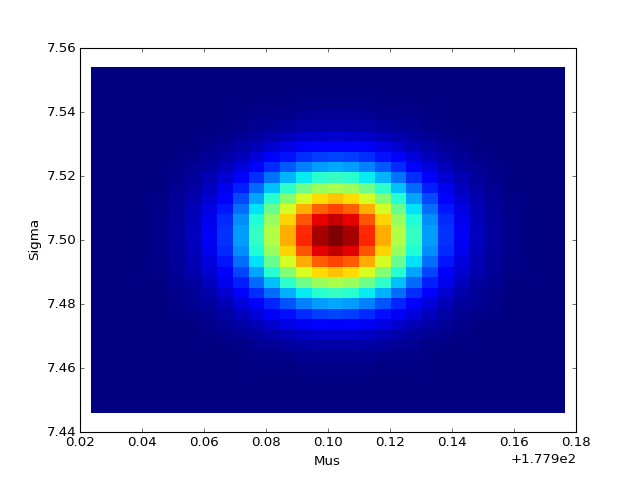

<IPython.core.display.Javascript object>


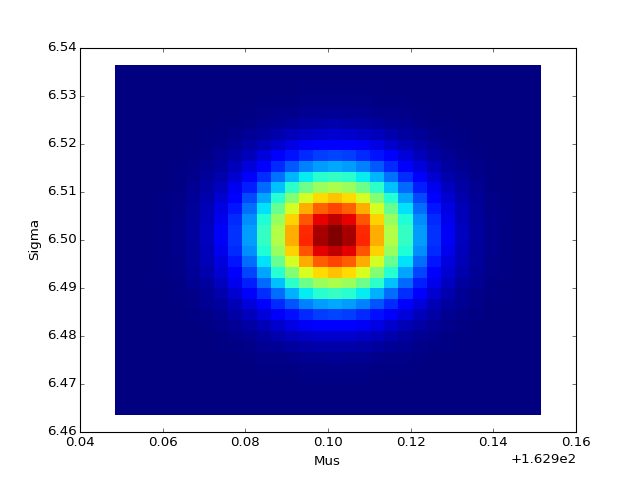

0.0398774563912 0.0421351030438 1.0


<IPython.core.display.Javascript object>


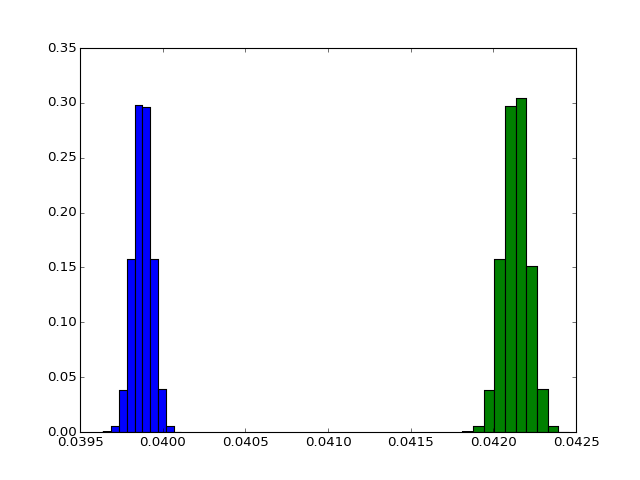

(array([  2.96959485e-04,   5.32609884e-03,   3.83728085e-02,
          1.57978643e-01,   2.97315938e-01,   3.04203524e-01,
          1.51190611e-01,   3.92637995e-02,   5.70324193e-03,
          3.48375582e-04]),
 array([ 0.04181361,  0.04187788,  0.04194215,  0.04200643,  0.0420707 ,
         0.04213497,  0.04219924,  0.04226351,  0.04232778,  0.04239206,
         0.04245633]),
 <a list of 10 Patch objects>)

In [6]:
d.keys()
labels = {1:'male', 2:'female'}

for i in [1,2]:
    datause=np.array(d[i][:])

    #mean=datause.mean(dtype=np.float64)
    #std=datause.std(dtype=np.float64)
    
    num_sigmas=1
    mean=np.percentile(datause,50)

    p=scipy.special.erf(num_sigmas/np.sqrt(2))
    alpha=(1-p)/2
    ipr = np.percentile(datause,(1-alpha)*100) - np.percentile(datause,alpha*100)
    std = ipr / 2 / num_sigmas
    
    
    
    
    n=datause.shape[0]

    e_mean=std/np.sqrt(n)
    e_std=std/np.sqrt(2 * (n-1))

    spread=4.0
    num_points=31

    Mus=np.linspace(mean-spread*e_mean,mean+spread*e_mean,num_points)
    Sigmas=np.linspace(std-spread*e_std,std+spread*e_std,num_points+3)

    mus,sigmas=np.meshgrid(Mus,Sigmas)
    shape=mus.shape

    prior=mus*0+1.
    prior=prior/prior.sum()
    
    


    posterior=scipy.stats.norm.logpdf(mean,mus,sigmas/np.sqrt(n))
    posterior+=scipy.stats.norm.logpdf(std,sigmas,sigmas/np.sqrt(2*(n-1)))
    
    posterior=posterior-posterior.max()
    posterior=np.exp(posterior)
    
    posterior=posterior/posterior.sum()

    plt.figure()
    plt.pcolormesh(Mus,Sigmas,posterior)
    plt.xlabel('Mus')
    plt.ylabel('Sigma')

    cvs=(sigmas/mus).flatten()
    inds=np.argsort(cvs)
    cvs=cvs[inds]
    cvspost=posterior.flatten()[inds]

    if i==1:
        cvsman=cvs.copy()
        cvspostman=cvspost.copy()
    if i==2:
        cvswoman=cvs.copy()
        cvspostwoman=cvspost.copy()

        
cvswomanA,cvsmanA=np.meshgrid(cvswoman,cvsman)
cvspostA=np.multiply.outer(cvspostwoman,cvspostman)


cvsdiff=cvsmanA-cvswomanA
print (cvswoman*cvspostwoman).sum(),(cvsman*cvspostman).sum(), cvspostA[cvsdiff>0].sum()

plt.figure()
plt.hist(cvswoman,weights=cvspostwoman)
plt.hist(cvsman,weights=cvspostman)

In [7]:
p=scipy.special.erf(num_sigmas/np.sqrt(2))
alpha=(1-p)/2
ipr = np.percentile(datause,(1-alpha)*100) - np.percentile(datause,alpha*100)
std = ipr / 2 / num_sigmas


In [8]:
datause=np.array(d[1][:])

print datause.mean(dtype=np.float64),datause.std(dtype=np.float64),datause.std(dtype=np.float64)/datause.mean(dtype=np.float64)


num_sigmas=1
mean=np.percentile(datause,50)

p=scipy.special.erf(num_sigmas/np.sqrt(2))
alpha=(1-p)/2
ipr = np.percentile(datause,(1-alpha)*100) - np.percentile(datause,alpha*100)
std = ipr / 2 / num_sigmas
print mean,std,std/mean


178.066221091 7.72353844434 0.0433745288523
178.0 7.5 0.0421348314607


<IPython.core.display.Javascript object>


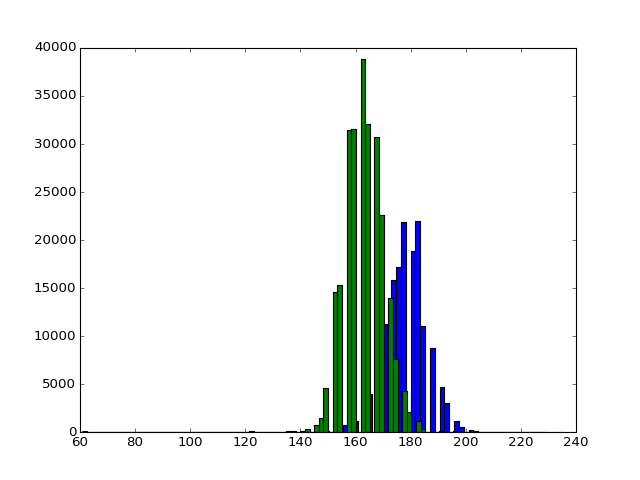

In [9]:
plt.figure()
plt.hist(np.array(d[1][:]),bins=100);
plt.hist(np.array(d[2][:]),bins=100);